# Prediction of Advertisement

## 1. Objective

In this document,  we will use the confusion matirx and ROC/AUC curve to predict whether a user will click on an advertisement or not.

## 2. Data Source

https://www.kaggle.com/gopalchettri/advertisement

## 3. Preview of Rows

This dataset contains:

* Daily Time Spent on Site

* Age 

* Area Income

* Daily Internet Usage

* Ad Topic Line

* City

* Male  ('0' stand fot women, '1' stand for men.)

* Country

* Timestamp

* Clicked on Ad  ('0' stand for not clicked on ad, and '1' stand for clicked on ad.)

## 4. Data Import and Data Cleaning

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [65]:
data=pd.read_csv('/Users/liwensun/opt/anaconda3/advertising.csv')

In [66]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [67]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### There is no null value in the dataset.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## 5. Data analysis

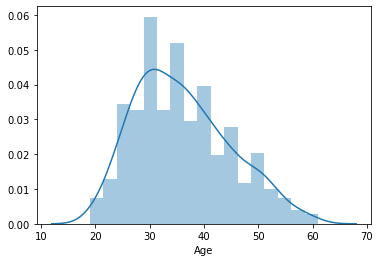

In [69]:
sns.distplot(data[data['Age'].notnull()]['Age'])

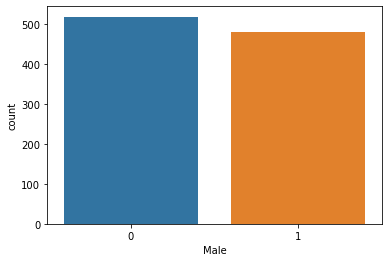

In [70]:
sns.countplot(x='Male',data=data)

#### It can be seen that the number of males and females is very close, and the number of people in the 30-40 age group takes the largest place.

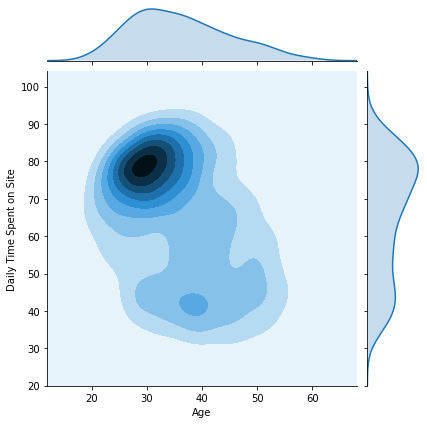

In [71]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data, kind='kde')

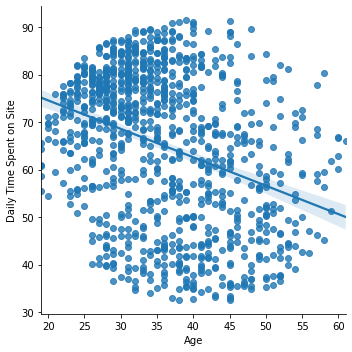

In [72]:
sns.lmplot(x='Age',y='Daily Time Spent on Site',data=data)

#### The data is concentrated in the 25-40 age group, and the time spent on site every day is between 65-90 minutes, and with the age increase, there is a dowing trend.

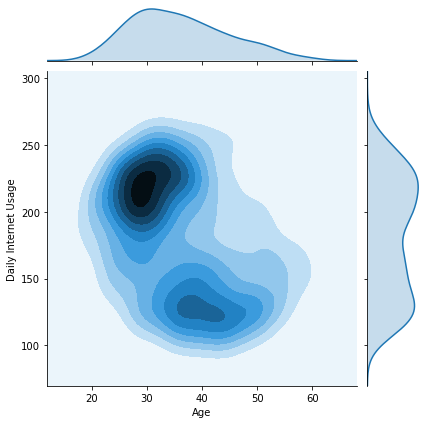

In [73]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=data, kind='kde')

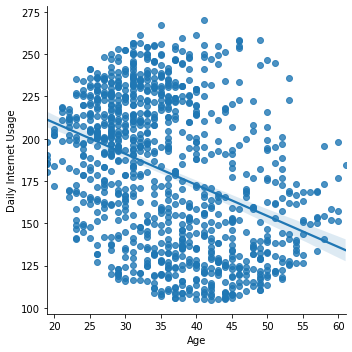

In [74]:
sns.lmplot(x='Age',y='Daily Internet Usage',data=data)

#### The data is concentrated in the 20-40 and 30-50 age groups, and the usage of interent every day is between 180-260 minutes and 100-160 minutes. With the age increase, there is also a dowing trend.

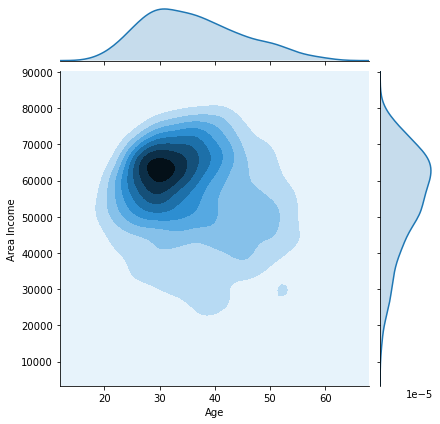

In [76]:
sns.jointplot(x='Age',y='Area Income',data=data, kind='kde')

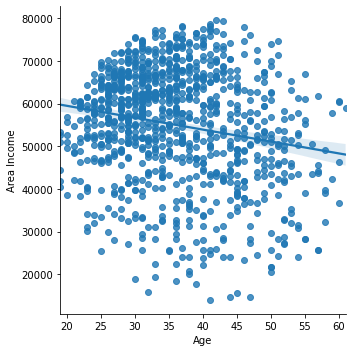

In [75]:
sns.lmplot(x='Age',y='Area Income',data=data)

#### The data is concentrated in the 25-35 age group, and the area income is between approximately 55000-70000. With the age increase, there is a dowing trend.

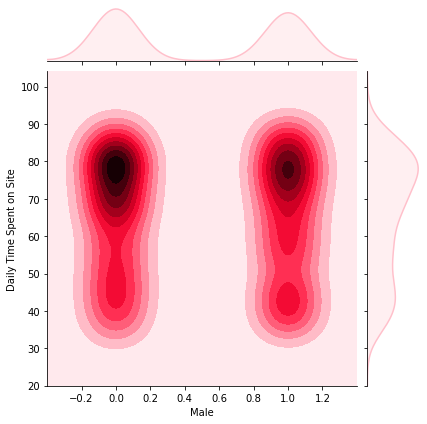

In [105]:
sns.jointplot(x='Male',y='Daily Time Spent on Site',data=data, kind='kde',color='pink')

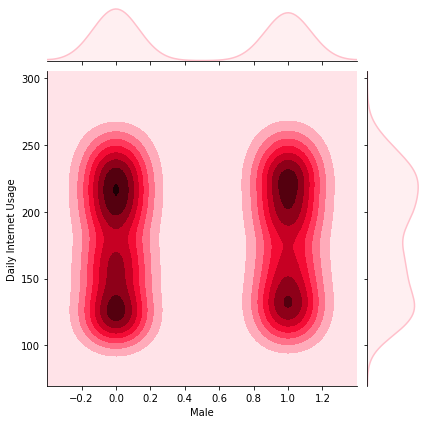

In [107]:
sns.jointplot(x='Male',y='Daily Internet Usage',data=data, kind='kde',color='pink')

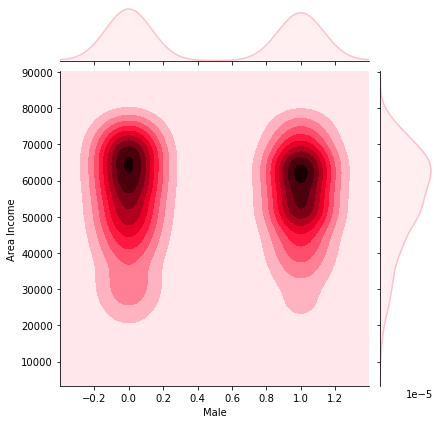

In [108]:
sns.jointplot(x='Male',y='Area Income',data=data, kind='kde',color='pink')

#### There is no big difference between men and women among row 'Daily Spent Time on Ad', 'Daily Internet Usage', 'Area Income'.

In [80]:
data['Date']=data['Timestamp'].apply(lambda x:x.split()[0])
data['Time']=data['Timestamp'].apply(lambda x:x.split()[1])
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18


In [81]:
data['Hour']=data['Time'].apply(lambda x:x[:2]).tolist()
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11,00
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02,01
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19,02
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18,03


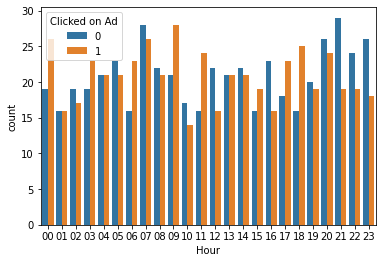

In [82]:
sns.countplot(x='Hour',hue='Clicked on Ad',data=data)

#### We separate the row 'Timestamp', and only keep the data of hours, then we count the time of people clicked on ad. From the graph, it can be seen that the top 5 clicked on time are 09 am, 00 am, 07 am, 18pm, 11am.

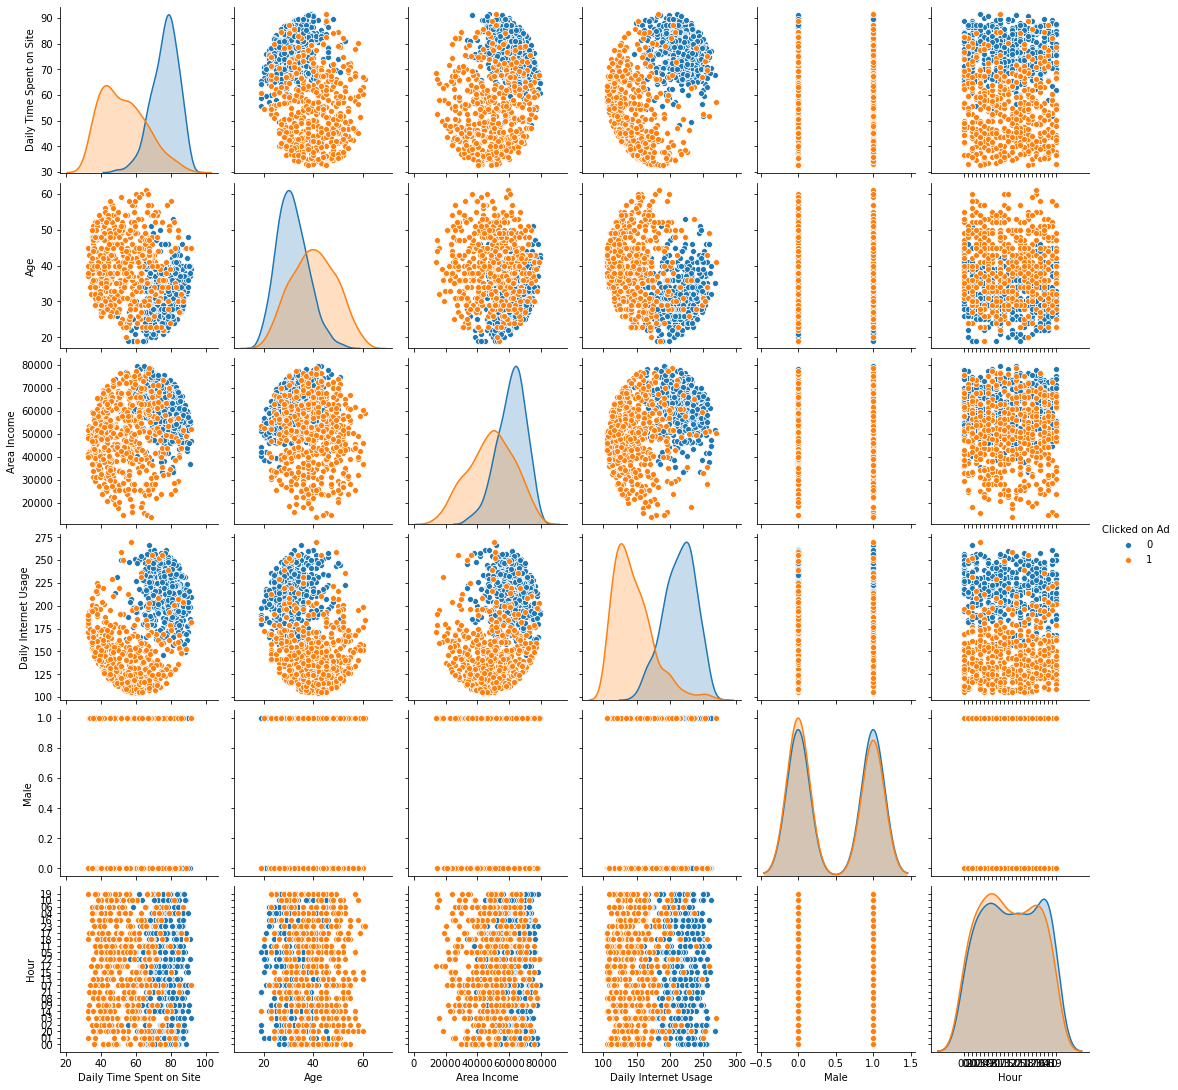

In [83]:
sns.pairplot(data,hue='Clicked on Ad')

In [84]:
x=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y=data['Clicked on Ad']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [85]:
lrModel=LogisticRegression()
lrModel.fit(x_train,y_train)

LogisticRegression()

In [86]:
lrModel.score(x,y)

0.9

In [87]:
prediction=lrModel.predict(x_test)

In [88]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       152
           1       0.95      0.89      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[145   7]
 [ 17 131]]


#### We use logistic regression to predict the model and the score is 0.9, which is a very high score and indicate that the prediction is credible.

#### The confussion matrix table shows that the True Positive value and True Negative value is way higher than False Positive value and False Negative value.

In [89]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [90]:
svm=svm.SVC(kernel='linear',probability=True)

In [91]:
y_score=svm.fit(x_train, y_train).decision_function(x_test)

In [92]:
fpr,tpr,threshold=roc_curve(y_test,y_score)

In [93]:
roc_auc=auc(fpr,tpr)

In [94]:
plt.figure()
lw=2

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

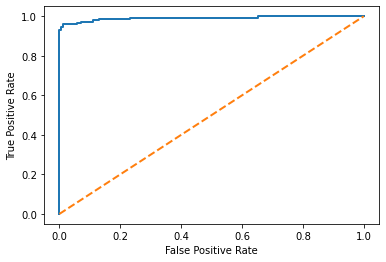

In [96]:
plt.plot(fpr,tpr,lw=lw,label='ROC curve')
plt.plot([0,1],[0,1],lw=lw,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show

#### We use ROC/AUC curve to perform that the model is capable of distinguishing between classes.